## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
# Importing the required packages
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from imblearn import over_sampling 
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploratory data analysis

In [4]:
df = pd.read_csv('/content/drive/My Drive/cap/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [0]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

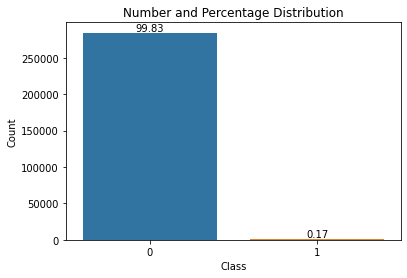

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
percent_share = iter((normal_share,fraud_share))

percent_plot = sns.barplot(df['Class'].unique(),df['Class'].value_counts(),orient='v')
percent_plot.set(xlabel='Class',ylabel='Count',title='Number and Percentage Distribution')

for p in percent_plot.patches:
    percent_plot.annotate(format(next(percent_share),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5),textcoords = 'offset points')

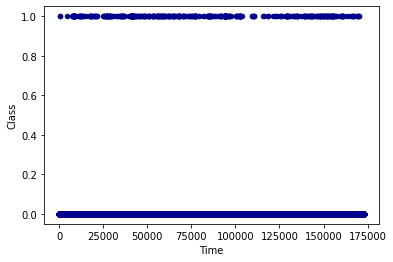

In [8]:
# Create a scatter plot to observe the distribution of classes with time
df1=df[['Time','Class']]
df1.plot.scatter(x='Time',y='Class',c='DarkBlue')

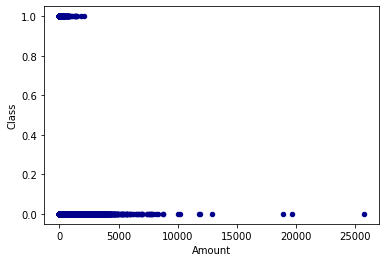

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
df3=df[['Amount','Class']]
df3.plot.scatter(x='Amount',y='Class',c='DarkBlue')

In [0]:
# Drop unnecessary columns
# The classes are distributed randomly over the time, thus there is no significance of the time variable.
df.drop(columns=['Time'],inplace=True) 

### Splitting the data into train & test data

In [0]:
y= df['Class']#class variable

In [0]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,test_size=0.3)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
351
141


### Plotting the distribution of a variable

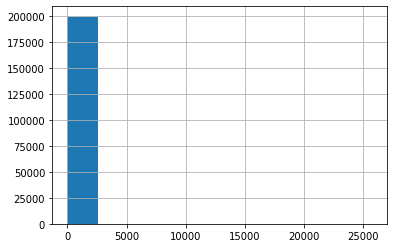

In [0]:
# plot the histogram of a variable from the dataset to see the skewness
X_train['Amount'].hist()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [0]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [0]:
pt = preprocessing.PowerTransformer(copy=False)
X_train_pt_array = pt.fit_transform(X_train)
X_test_pt_array = pt.transform(X_test)

In [0]:
# Creating dataframe for train and test dataset.
X_train_pt = pd.DataFrame(X_train_pt_array,columns=X_train.columns)
X_test_pt = pd.DataFrame(X_test_pt_array,columns=X_test.columns)

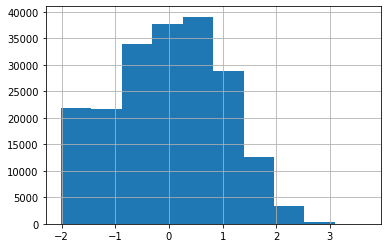

In [0]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_pt['Amount'].hist()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [0]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [2,5,10,15,20]  #--> list of values
cv_num = [2,4,6]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [0]:
y_train.reset_index(inplace=True,drop=True)

### Logistic Regression - Unbalanced

In [0]:
#perform cross validation

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]
    
#perform hyperparameter tuning

params = {'C':[0.01,0.05,0.1,0.25,0.5,1,2,5,10]}

lr = LogisticRegression()

model_lr_grid = GridSearchCV(estimator = lr, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1) 
model_lr_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_lr_grid.best_estimator_)
print("Best Accuracy - ", model_lr_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
model_lr_grid_pred = model_lr_grid.predict(X_test_cv)


print("F1-score: ",f1_score(y_true = y_test_cv,y_pred = model_lr_grid_pred))
print("Recall-score: ",recall_score(y_true = y_test_cv,y_pred = model_lr_grid_pred))
print("Precision-score: ",precision_score(y_true = y_test_cv,y_pred = model_lr_grid_pred))               

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_lr_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   51.1s finished


Best Estimator -  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best Accuracy -  0.7404137817070147
F1-score:  0.8270676691729323
Recall-score:  0.7746478873239436
Precision-score:  0.8870967741935484
Optimal value of Hyperparameter -  {'C': 1}


In [0]:
print("F1-score: ",f1_score(y_true = y_test_cv,y_pred = model_lr_grid_pred,average=None))
print("Recall-score: ",recall_score(y_true = y_test_cv,y_pred = model_lr_grid_pred,average=None))
print("Precision-score: ",precision_score(y_true = y_test_cv,y_pred = model_lr_grid_pred,average=None))               


F1-score:  [0.9997111  0.82706767]
Recall-score:  [0.99982413 0.77464789]
Precision-score:  [0.99959809 0.88709677]


### XGBoost - Unbalanced

In [0]:
#perform cross validation

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]
    
#perform hyperparameter tuning

params = {'learning_rate': [0.05,0.1,0.25],
         'n_estimators': [50,100],
         'min_samples_leaf': [10,15]}

gbc = GradientBoostingClassifier()

model_gbc_grid = GridSearchCV(estimator = gbc, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                                            return_train_score=True,
                        verbose = 1,
                        n_jobs=-1) 
model_gbc_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_gbc_grid.best_estimator_)
print("Best Accuracy - ", model_gbc_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
model_dt_grid_pred = model_gbc_grid.predict(X_test_cv)


print("F1-score: ",f1_score(y_true = y_test_cv,y_pred = model_dt_grid_pred))
print("Recall-score: ",recall_score(y_true = y_test_cv,y_pred = model_dt_grid_pred))
print("Precision-score: ",precision_score(y_true = y_test_cv,y_pred = model_dt_grid_pred))               

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_gbc_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 65.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 296.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 366.3min finished


Best Estimator -  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Best Accuracy -  0.775314465408805
F1-score:  0.8307692307692307
Recall-score:  0.7605633802816901
Precision-score:  0.9152542372881356
Optimal value of Hyperparameter -  {'learning_rate': 0.05, 'min_samples_leaf': 5, 'n_estimators': 100}


### Random Forests - Unbalanced

In [0]:
#perform cross validation
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]
    
#perform hyperparameter tuning

params = {'n_estimators': [50,75],
         'max_depth': [5,15],
         'min_samples_split': [10,25,50],
         'min_samples_leaf': [5,10,15]}

rfc = RandomForestClassifier()

model_rf_grid = GridSearchCV(estimator = rfc, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1) 
model_rf_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_rf_grid.best_estimator_)
print("Best Accuracy - ", model_rf_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
model_rf_grid_pred = model_rf_grid.predict(X_test_cv)

print("F1-score: ",f1_score(y_true = y_test_cv,y_pred = model_rf_grid_pred))
print("Recall-score: ",recall_score(y_true = y_test_cv,y_pred = model_rf_grid_pred))
print("Precision-score: ",precision_score(y_true = y_test_cv,y_pred = model_rf_grid_pred))               

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_rf_grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 95.4min finished


Best Estimator -  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Accuracy -  0.8286565839218103
F1-score:  0.8656716417910447
Recall-score:  0.8169014084507042
Precision-score:  0.9206349206349206
Optimal value of Hyperparameter -  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 50}


### KNN - Unbalanced

In [0]:
#perform cross validation
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]
    
#perform hyperparameter tuning

params = {'n_neighbors':[2,4,6,8,10] ,
         'leaf_size': [15,20,30,40]}

knn = KNeighborsClassifier()

model_knn_grid = GridSearchCV(estimator = knn, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1) 
model_knn_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_knn_grid.best_estimator_)
print("Best Accuracy - ", model_knn_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
model_knn_grid_pred = model_knn_grid.predict(X_test_cv)

print("F1-score: ",f1_score(y_true = y_test_cv,y_pred = model_knn_grid_pred))
print("Recall-score: ",recall_score(y_true = y_test_cv,y_pred = model_knn_grid_pred))
print("Precision-score: ",precision_score(y_true = y_test_cv,y_pred = model_knn_grid_pred))               

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_knn_grid.best_params_)

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [0]:
clf = RandomForestClassifier(max_depth= 15, min_samples_leaf= 5, min_samples_split= 10, n_estimators= 50)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
# print --> #print the evaluation score on the X_test by choosing the best evaluation metric
clf_pred = clf.predict(X_test)

print("F1-score: ",f1_score(y_true = y_test,y_pred = clf_pred))
print("Recall-score: ",recall_score(y_true = y_test,y_pred = clf_pred))
print("Precision-score: ",precision_score(y_true = y_test,y_pred = clf_pred))               


F1-score:  0.818840579710145
Recall-score:  0.7533333333333333
Precision-score:  0.8968253968253969


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 13


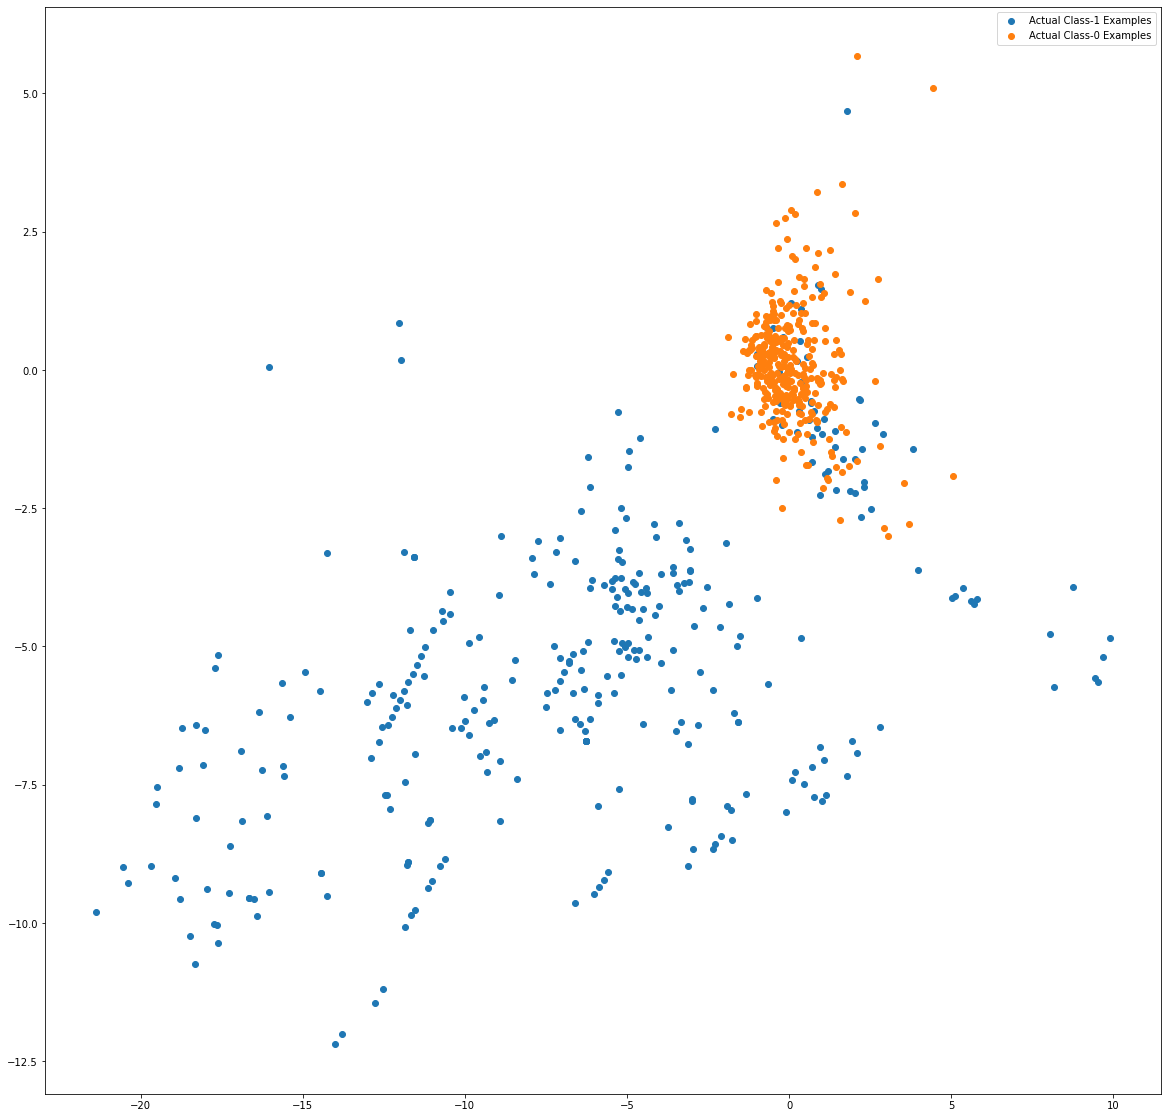

In [0]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [0]:
# Logistic Regression
from sklearn import linear_model #import the package


num_C = [2,5,10,15,20]  #--> list of values
cv_num = [2,4,6]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

### Decision Tree - Random Oversampling

In [0]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]


ros = RandomOverSampler(random_state=0)
X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
print('Resampled dataset shape %s' % Counter(y_train_cv))

#perform hyperparameter tuning

params = {'max_depth': [5,15],
         'min_samples_split': [10,25,50],
         'min_samples_leaf': [5,10,15]}

rfc = DecisionTreeClassifier()

model_rf_grid = GridSearchCV(estimator = rfc, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1) 
model_rf_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_rf_grid.best_estimator_)
print("Best Accuracy - ", model_rf_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
clf_pred = model_rf_grid.predict(X_test)
print("F1-score: ",f1_score(y_true = y_test,y_pred = clf_pred))
print("Recall-score: ",recall_score(y_true = y_test,y_pred = clf_pred))
print("Precision-score: ",precision_score(y_true = y_test,y_pred = clf_pred)) 

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_rf_grid.best_params_)



### Random Forest - Random Oversampling

In [0]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]


ros = RandomOverSampler(random_state=0)
X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
print('Resampled dataset shape %s' % Counter(y_train_cv))

#perform hyperparameter tuning
params = {'n_estimators': [50,75],
         'max_depth': [5,15],
         'min_samples_split': [10,25,50],
         'min_samples_leaf': [5,10,15]}

rfc = RandomForestClassifier()

model_rf_grid = GridSearchCV(estimator = rfc, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1) 
model_rf_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_rf_grid.best_estimator_)
print("Best Accuracy - ", model_rf_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
clf_pred = model_rf_grid.predict(X_test)
print("F1-score: ",f1_score(y_true = y_test,y_pred = clf_pred))
print("Recall-score: ",recall_score(y_true = y_test,y_pred = clf_pred))
print("Precision-score: ",precision_score(y_true = y_test,y_pred = clf_pred)) 

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_rf_grid.best_params_)

##XGBOOST Random Oversampling

In [0]:
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
print('Original dataset had 1s: ',np.sum(y_train))
ros = RandomOverSampler(random_state=42)
X_train_cv, y_train_cv = ros.fit_resample(X_train_pt, y_train)
print('Post Random Over Sampling, dataset has 1s: ',np.sum(y_train_cv))

print('\n XG Boost - Random Oversampling\n')
#perform cross validation
#seed=7
scoring = {'accuracy' : make_scorer(accuracy_score),'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score), 
           'roc_auc_score' : make_scorer(roc_auc_score)}
kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
model = xgb.XGBClassifier()
results = model_selection.cross_validate(model, X_train_cv, y_train_cv, cv=kfold,scoring=scoring)
print("Cross Validation Evaluation before Hyper Parameter Tuning")
print("Accuracy: ", results['test_accuracy'].mean())
print("Precision: ", results['test_precision'].mean())
print("Recall: ", results['test_recall'].mean())
print("F1 Score: ", results['test_f1_score'].mean())
print("AUC: ", results['test_roc_auc_score'].mean())

#perform hyperparameter tuning
params = {'learning_rate': [0.01],'n_estimators': [5,10,15,20,25,30],'max_depth':[7,8,9],'reg_alpha':[0.3,0.4,0.5]}
xgb_model = xgb.XGBClassifier()
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,verbose=True,cv=5,n_jobs=2)

# Fit grid search
best_model_xg_os = gsearch.fit(X_train_cv, y_train_cv)

#print the evaluation result by choosing a evaluation metric
xg_prediction_os=best_model_xg_os.predict(X_test_pt)
precision, recall, fscore, support = score(y_test, xg_prediction_os)
print("\n XGBoost with HyperParameter Tuning")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#print the optimum value of hyperparameters
print('\n Optimum value of Hyper Parameters')
print('Best learning rate:', best_model_xg_os.best_estimator_.get_params()['learning_rate'])
print('Best Estimators:', best_model_xg_os.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_model_xg_os.best_estimator_.get_params()['max_depth'])
print('Best Alpha:', best_model_xg_os.best_estimator_.get_params()['reg_alpha'])

### Print the class distribution after applying SMOTE 

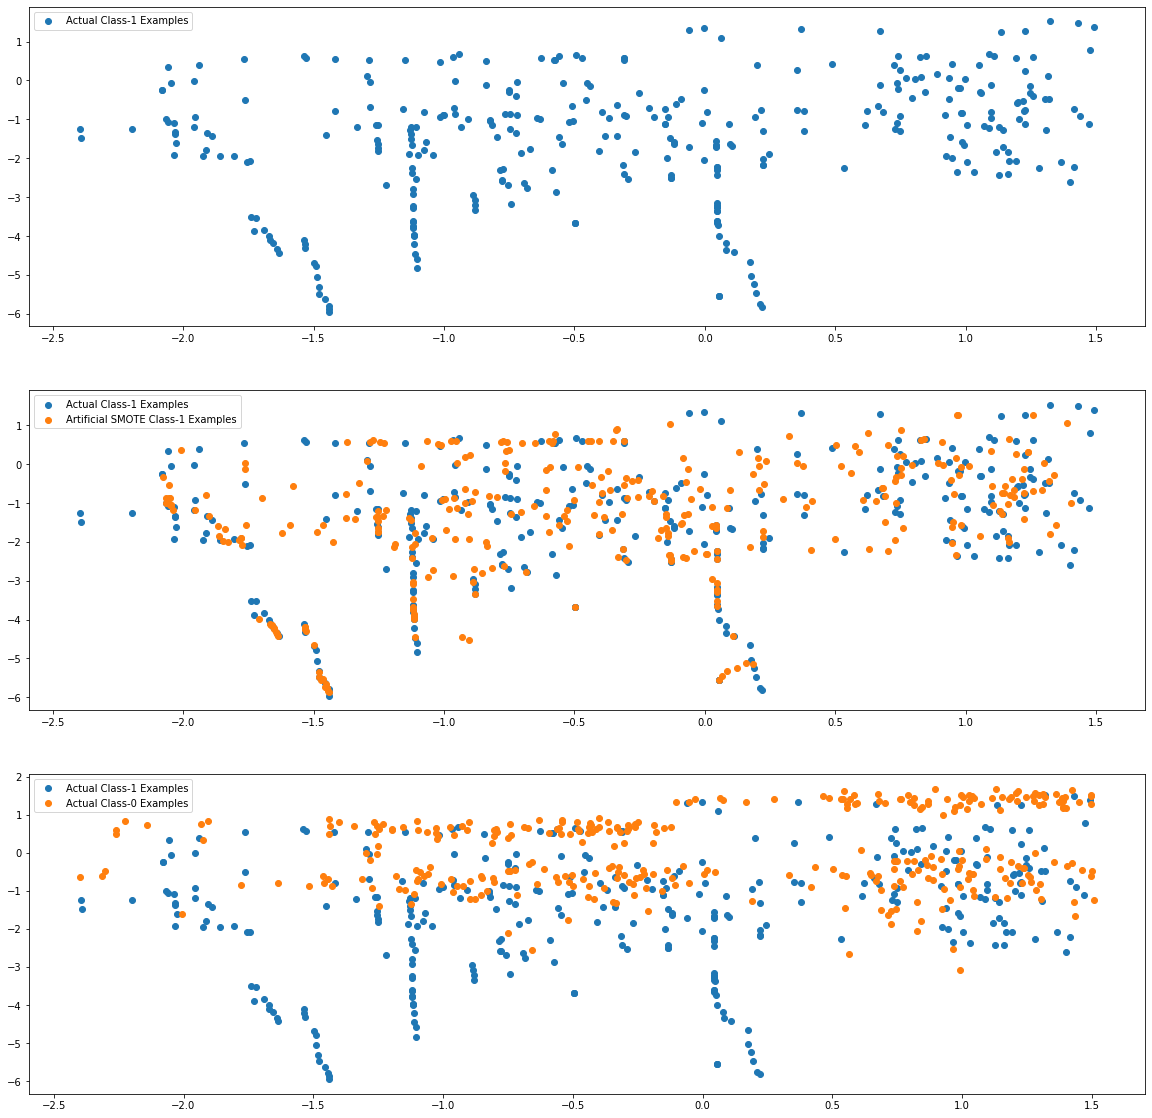

In [0]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Decision Tree - SMOTE

In [0]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]


smote = SMOTE(random_state=0)
X_train_cv, y_train_cv = smote.fit_resample(X_train_cv, y_train_cv)
print('Resampled dataset shape %s' % Counter(y_train_cv))


#perform hyperparameter tuning
params = {'max_depth': [5,15],
         'min_samples_split': [10,25,50],
         'min_samples_leaf': [5,10,15]}

rfc = DecisionTreeClassifier()

model_rf_grid = GridSearchCV(estimator = rfc, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1) 
model_rf_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_rf_grid.best_estimator_)
print("Best Accuracy - ", model_rf_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
clf_pred = model_rf_grid.predict(X_test)
print("F1-score: ",f1_score(y_true = y_test,y_pred = clf_pred))
print("Recall-score: ",recall_score(y_true = y_test,y_pred = clf_pred))
print("Precision-score: ",precision_score(y_true = y_test,y_pred = clf_pred)) 

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_rf_grid.best_params_)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 159215, 1: 159215})
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.1min finished


Best Estimator -  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Accuracy -  0.9966916726836086
F1-score:  0.3449275362318841
Recall-score:  0.815068493150685
Precision-score:  0.21875
Optimal value of Hyperparameter -  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


### Random Forest - SMOTE

In [0]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]


smote = SMOTE(random_state=0)
X_train_cv, y_train_cv = smote.fit_resample(X_train_cv, y_train_cv)
print('Resampled dataset shape %s' % Counter(y_train_cv))


#perform hyperparameter tuning

params = {'n_estimators': [50,75],
         'max_depth': [5,15],
         'min_samples_split': [10,25],
         'min_samples_leaf': [5,10,15]}
rfc = RandomForestClassifier()

model_rf_grid_smote = GridSearchCV(estimator = rfc, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1) 
model_rf_grid_smote.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_rf_grid_smote.best_estimator_)
print("Best Accuracy - ", model_rf_grid_smote.best_score_)


#print the evaluation result by choosing a evaluation metric
clf_pred = model_rf_grid_smote.predict(X_test)
print("F1-score: ",f1_score(y_true = y_test,y_pred = clf_pred))
print("Recall-score: ",recall_score(y_true = y_test,y_pred = clf_pred))
print("Precision-score: ",precision_score(y_true = y_test,y_pred = clf_pred)) 

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_rf_grid_smote.best_params_)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 159215, 1: 159215})
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 126.1min finished


Best Estimator -  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Accuracy -  0.999560379712079
F1-score:  0.7637540453074434
Recall-score:  0.8082191780821918
Precision-score:  0.7239263803680982
Optimal value of Hyperparameter -  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 75}


##XGBOOST - SMOTE

In [0]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, y_train)
print('Original dataset had 1s: ',np.sum(y_train))
print('Post Smote, dataset has 1s: ',np.sum(y_train_smote))

#perform cross validation
#seed=7
scoring = {'accuracy' : make_scorer(accuracy_score),'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score), 
           'roc_auc_score' : make_scorer(roc_auc_score)}
kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
model = xgb.XGBClassifier()
results = model_selection.cross_validate(model, X_train_smote, y_train_smote, cv=kfold,scoring=scoring)
print("Cross Validation Evaluation before Hyper Parameter Tuning")
print("Accuracy: ", results['test_accuracy'].mean())
print("Precision: ", results['test_precision'].mean())
print("Recall: ", results['test_recall'].mean())
print("F1 Score: ", results['test_f1_score'].mean())
print("AUC: ", results['test_roc_auc_score'].mean())

#perform hyperparameter tuning
params = {'learning_rate': [0.01],'n_estimators': [5,10,15,20,25,30],'max_depth':[7,8,9],'reg_alpha':[0.3,0.4,0.5]}
xgb_model = xgb.XGBClassifier()
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,verbose=True,cv=5,n_jobs=2)

# Fit grid search
best_model_xg_sm = gsearch.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric
xg_prediction_sm=best_model_xg_sm.predict(X_test_pt)
precision, recall, fscore, support = score(y_test, xg_prediction_sm)
print("XGBoost with HyperParameter Tuning")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#print the optimum value of hyperparameters
print('Best learning rate:', best_model_xg_sm.best_estimator_.get_params()['learning_rate'])
print('Best Estimators:', best_model_xg_sm.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_model_xg_sm.best_estimator_.get_params()['max_depth'])
print('Best Alpha:', best_model_xg_sm.best_estimator_.get_params()['reg_alpha'])

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [0]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Decision Tree - Adasyn

In [0]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]


adasyn = ADASYN(random_state=0)
X_train_cv, y_train_cv = adasyn.fit_resample(X_train_cv, y_train_cv)
print('Resampled dataset shape %s' % Counter(y_train_cv))

#perform hyperparameter tuning

params = {'max_depth': [5,15,20],
         'min_samples_split': [10,25,50],
         'min_samples_leaf': [5,10,15]}

rfc = DecisionTreeClassifier()

model_rf_grid = GridSearchCV(estimator = rfc, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1) 
model_rf_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_rf_grid.best_estimator_)
print("Best Accuracy - ", model_rf_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
clf_pred = model_rf_grid.predict(X_test)
print("F1-score: ",f1_score(y_true = y_test,y_pred = clf_pred))
print("Recall-score: ",recall_score(y_true = y_test,y_pred = clf_pred))
print("Precision-score: ",precision_score(y_true = y_test,y_pred = clf_pred)) 

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_rf_grid.best_params_)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0: 199022, 1: 198971})
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 14.8min finished


Best Estimator -  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Accuracy -  0.9283284287465656
F1-score:  0.15530303030303033
Recall-score:  0.82
Precision-score:  0.08577405857740586
Optimal value of Hyperparameter -  {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 25}


##### Build models on other algorithms to see the better performing on ADASYN

### Random Forest - Adasyn 

In [0]:
#perform cross validation 
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=100)

for train_index,test_index in skf.split(X_train_pt,y_train):
    X_train_cv,X_test_cv = X_train_pt.loc[train_index],X_train_pt.loc[test_index]
    y_train_cv,y_test_cv = y_train.loc[train_index],y_train.loc[test_index]


adasyn = ADASYN(random_state=0)
X_train_cv, y_train_cv = adasyn.fit_resample(X_train_cv, y_train_cv)
print('Resampled dataset shape %s' % Counter(y_train_cv))


#perform hyperparameter tuning

params = {'n_estimators': [50,75],
         'max_depth': [5,15],
         'min_samples_split': [10,25],
         'min_samples_leaf': [5,10,15]}
rfc = RandomForestClassifier()

model_rf_grid = GridSearchCV(estimator = rfc, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1) 
model_rf_grid.fit(X_train_cv,y_train_cv)
print("Best Estimator - ",model_rf_grid.best_estimator_)
print("Best Accuracy - ", model_rf_grid.best_score_)


#print the evaluation result by choosing a evaluation metric
clf_pred = model_rf_grid.predict(X_test)
print("F1-score: ",f1_score(y_true = y_test,y_pred = clf_pred))
print("Recall-score: ",recall_score(y_true = y_test,y_pred = clf_pred))
print("Precision-score: ",precision_score(y_true = y_test,y_pred = clf_pred)) 

#print the optimum value of hyperparameters
print("Optimal value of Hyperparameter - ", model_rf_grid.best_params_)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({1: 199027, 0: 199018})
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 146.6min finished


Best Estimator -  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Accuracy -  0.9107821061495056
F1-score:  0.6373056994818652
Recall-score:  0.8424657534246576
Precision-score:  0.5125
Optimal value of Hyperparameter -  {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}


## XGBOOST - ADASYN

In [0]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = Ada.fit_resample(X_train_pt, y_train)
print('Original dataset had 1s: ',np.sum(y_train))
print('Post Adasyn Over Sampling, dataset has 1s: ',np.sum(y_train_adasyn))

#perform cross validation
#seed=7
scoring = {'accuracy' : make_scorer(accuracy_score),'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score), 
           'roc_auc_score' : make_scorer(roc_auc_score)}
kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
model = xgb.XGBClassifier()
results = model_selection.cross_validate(model, X_train_adasyn, y_train_adasyn, cv=kfold,scoring=scoring)
print("Cross Validation Evaluation before Hyper Parameter Tuning")
print("Accuracy: ", results['test_accuracy'].mean())
print("Precision: ", results['test_precision'].mean())
print("Recall: ", results['test_recall'].mean())
print("F1 Score: ", results['test_f1_score'].mean())
print("AUC: ", results['test_roc_auc_score'].mean())

#perform hyperparameter tuning
params = {'learning_rate': [0.01],'n_estimators': [5,15,20,25,30],'max_depth':[7,8,9],'reg_alpha':[0.3,0.4]}
xgb_model = xgb.XGBClassifier()
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,verbose=True,cv=5,n_jobs=2)

# Fit grid search
best_model_xg_ad = gsearch.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
xg_prediction_ad=best_model_xg_ad.predict(X_test_pt)
precision, recall, fscore, support = score(y_test, xg_prediction_ad)
print("XGBoost with HyperParameter Tuning")
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

#print the optimum value of hyperparameters
print('Best learning rate:', best_model_xg_ad.best_estimator_.get_params()['learning_rate'])
print('Best Estimators:', best_model_xg_ad.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_model_xg_ad.best_estimator_.get_params()['max_depth'])
print('Best Alpha:', best_model_xg_ad.best_estimator_.get_params()['reg_alpha'])

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [0]:
# perform the best oversampling method on X_train & y_train
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_cv))
# 75,15,5,15
clf = RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=5,min_samples_split=15)  #initialise the model with optimum hyperparameters
clf.fit(X_train,y_train) # fit on the balanced dataset

# print() --> #print the evaluation score on the X_test by choosing the best evaluation metric
clf_pred = clf.predict(X_test)
print("F1-score: ",f1_score(y_true = y_test,y_pred = clf_pred))
print("Recall-score: ",recall_score(y_true = y_test,y_pred = clf_pred))
print("Precision-score: ",precision_score(y_true = y_test,y_pred = clf_pred)) 


Resampled dataset shape Counter({0: 199018, 1: 199018})
F1-score:  0.7731629392971245
Recall-score:  0.8287671232876712
Precision-score:  0.7245508982035929


### Print the important features of the best model to understand the dataset

In [0]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [0]:
#### Print the FPR,TPR & select the best threshold from the roc curve

Train auc = 0.8800783675926228
1


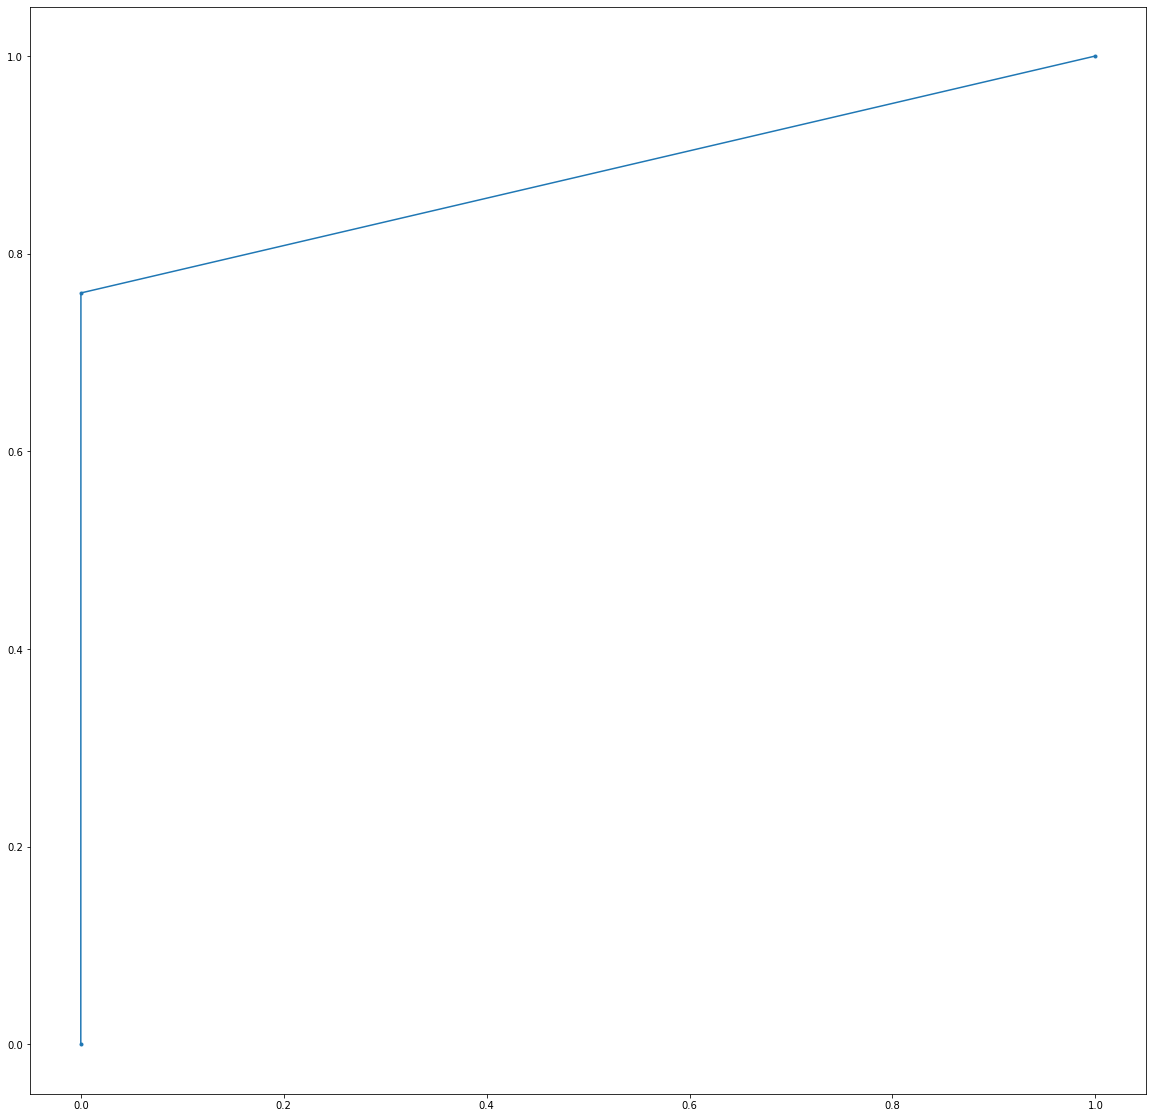

In [0]:
print('Train auc =', metrics.roc_auc_score(y_true = y_test,y_score = clf_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test,y_score = clf_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)
plt.plot(fpr, tpr, marker='.', label='Random Forest - Smote')